# <span style='font-family:Georgia'> **Telco Customer Churn**

## The data set is an IBM Sample Data Sets which has relevant customer data to develop a customer retention program. The data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3. It indicates which customers have left, stayed, or signed up for their service. 

### The Dataset can be downloaded through: [Dataset Link ](https://www.kaggle.com/datasets/blastchar/telco-customer-churn?datasetId=13996&sortBy=commentCount)

## <span style='font-family:Georgia'> The Questions: 
### 1.	What are the main reasons (features) contributing to customer’s churn?
### 2.	What types of customers are more likely to churn? 
### 3.	What can we do to stop customers from leaving and terminate their services?


## Data Dictionary

**CustomerID** : A unique ID that identifies each customer.

**Gender**: The customer’s gender: Male, Female

**Age**: The customer’s current age, in years, at the time the fiscal quarter ended.

**Senior Citizen**: Indicates if the customer is 65 or older: Yes, No

**Married (Partner)**: Indicates if the customer is married: Yes, No

**Dependents**: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

**Number of Dependents**: Indicates the number of dependents that live with the customer.

**Phone Service**: Indicates if the customer subscribes to home phone service with the company: Yes, No

**Multiple Lines**: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

**Internet Service**: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

**Online Security**: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

**Online Backup**: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

**Device Protection Plan**: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

**Premium Tech Support**: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

**Streaming TV**: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Streaming Movies**: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

**Contract**: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

**Paperless Billing**: Indicates if the customer has chosen paperless billing: Yes, No

**Payment Method**: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

**Monthly Charge**: Indicates the customer’s current total monthly charge for all their services from the company.

**Total Charges**: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

**Tenure**: Indicates the total amount of months that the customer has been with the company.

**Churn**: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.



# 1. Reading and Exploring the Data

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from IPython.display import Markdown
import plotly.express as px
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve,silhouette_score

import scikitplot as skplt

from sklearn.metrics import confusion_matrix


import optuna



%matplotlib inline 


In [2]:
def printmd(string):
    display(Markdown(string))


In [3]:
customer = pd.read_csv('TelcoCustomer.csv', index_col=0)


printmd(f"Dataset Dimensions : **{customer.shape[0]}** Rows,  **{customer.shape[1]}** Columns")

Dataset Dimensions : **7043** Rows,  **20** Columns

In [4]:
customer.head(10)

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   
9305-CDSKC  Female              0      No         No       8          Yes   
1452-KIOVK    Male              0      No        Yes      22          Yes   
6713-OKOMC  Female              0      No         No      10           No   
7892-POOKP  Female              0     Yes         No      28          Yes   
6388-TABGU    Male              0      No        Yes      62          Yes   

               MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                                 
7590-VHVEG  No phone service             DSL             No          Yes   
5575-GNVDE                No             DSL            Yes           No   
3668-QPYBK                No             DSL            Yes          Yes   
7795-CFOCW  No phone service             DSL            Yes           No   
9237-HQITU                No     Fiber optic             No           No   
9305-CDSKC               Yes     Fiber optic             No           No   
1452-KIOVK               Yes     Fiber optic             No          Yes   
6713-OKOMC  No phone service             DSL            Yes           No   
7892-POOKP               Yes     Fiber optic             No           No   
6388-TABGU                No             DSL            Yes          Yes   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   
9305-CDSKC              Yes          No         Yes             Yes   
1452-KIOVK               No          No         Yes              No   
6713-OKOMC               No          No          No              No   
7892-POOKP              Yes         Yes         Yes             Yes   
6388-TABGU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   
9305-CDSKC  Month-to-month              Yes           Electronic check   
1452-KIOVK  Month-to-month              Yes    Credit card (automatic)   
6713-OKOMC  Month-to-month               No               Mailed check   
7892-POOKP  Month-to-month              Yes           Electronic check   
6388-TABGU        One year               No  Bank transfer (automatic)   

            MonthlyCharges TotalCharges Churn  
customerID                                     
7590-VHVEG           29.85        29.85    No  
5575-GNVDE           56.95       1889.5    No  
3668-QPYBK           53.85       108.15   Yes  
7795-CFOCW           42.30      1840.75    No  
9237-HQITU           70.70       151.65   Yes  
9305-CDSKC           99.65        820.5   Yes  
1452-KIOVK           89.10       1949.4    No  


In [5]:
customer.describe().T

count       mean        std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.162147   0.368612   0.00   0.0   0.00   0.00   
tenure          7043.0  32.371149  24.559481   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.761692  30.090047  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75

In [6]:
customer.describe(include=['object']).T

count unique               top  freq
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531                      11
Churn             7043      2                No  5174

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

## 2. Cleaning and Tuning the Data

Columns with missing values: 0


<AxesSubplot:>

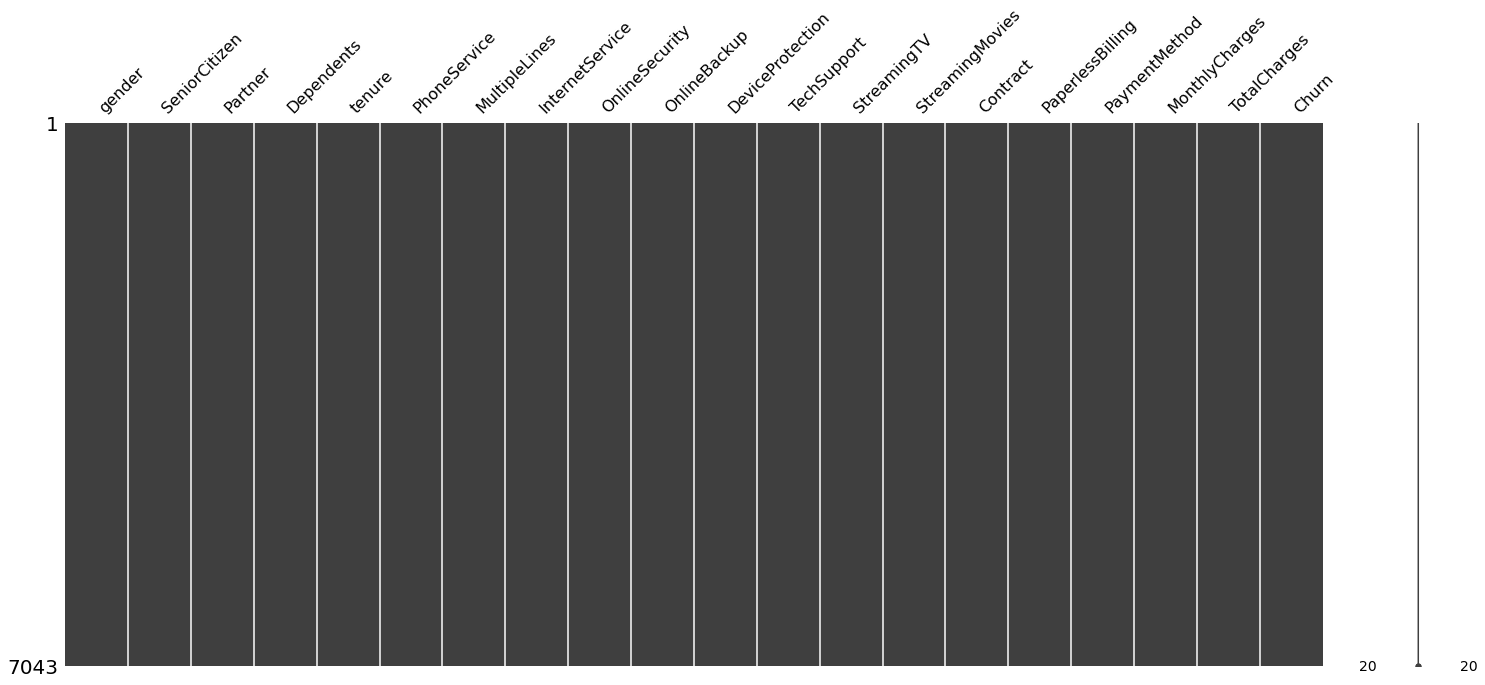

In [8]:
# check for the null values


columns_NA = customer.isna().sum()[customer.isna().sum() !=0].sort_values(ascending=False)

print('Columns with missing values:', len(columns_NA))



msno.matrix(customer)



# there all no null values in the dataset .

### <span style='color:Blue'> Using the matrix we can quickly find out if there is any missing values . 

### <span style='color:Blue'> From the visualiziation it is clear that the data set does not have any missing values. </span>

In [9]:
# Remove the customer id from the dataset 



customer = customer.reset_index()

customer

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [10]:


# replace all  no internet service / no phone service to NO

customer.replace('No internet service','No',inplace=True)
customer.replace('No phone service','No',inplace=True)



customer

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [11]:
# Renaming some values

customer.replace('Bank transfer (automatic)','Bank Transfer',inplace=True)
customer.replace('Credit card (automatic)','Credit Card',inplace=True)
customer.replace('Month-to-month','Monthly',inplace=True)







In [12]:
# check if there are any zero values in tensure feature


customer[customer['tenure'] == 0].index

# we have 11 missing values , lets delete them 


customer.drop(labels=customer[customer['tenure'] == 0].index, axis=0, inplace=True)


customer[customer['tenure'] == 0].index




Int64Index([], dtype='int64')

In [13]:
# convert total charges column to float type 

customer['TotalCharges'] = customer['TotalCharges'].astype(float)

In [14]:
customer.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# get te unique number of every column



Categorical_Feature = customer.columns[customer.dtypes==object].tolist()


Numeric_Feature = customer.columns[customer.dtypes!=object].tolist()


        
printmd("**-------------------- Categorical Fields --------------------**\n")
for i in range(len(Categorical_Feature)):
    if customer[Categorical_Feature[i]].dtypes==object:
        printmd("Unique number of {} -> {}".format(Categorical_Feature[i],
                                                 len(customer[Categorical_Feature[i]].unique())))
        
printmd("\n**-------------------- Numeric Fields --------------------**\n")
for i in range(len(Numeric_Feature)):
    if customer[Numeric_Feature[i]].dtypes!=object:
        printmd("Unique number of {} -> {}".format(Numeric_Feature[i], 
                                                 len(customer[Numeric_Feature[i]].unique())))
        
        

**-------------------- Categorical Fields --------------------**


Unique number of customerID -> 7032

Unique number of gender -> 2

Unique number of Partner -> 2

Unique number of Dependents -> 2

Unique number of PhoneService -> 2

Unique number of MultipleLines -> 2

Unique number of InternetService -> 3

Unique number of OnlineSecurity -> 2

Unique number of OnlineBackup -> 2

Unique number of DeviceProtection -> 2

Unique number of TechSupport -> 2

Unique number of StreamingTV -> 2

Unique number of StreamingMovies -> 2

Unique number of Contract -> 3

Unique number of PaperlessBilling -> 2

Unique number of PaymentMethod -> 4

Unique number of Churn -> 2


**-------------------- Numeric Fields --------------------**


Unique number of SeniorCitizen -> 2

Unique number of tenure -> 72

Unique number of MonthlyCharges -> 1584

Unique number of TotalCharges -> 6530

In [16]:
for i in range(len(Categorical_Feature)):
    printmd("\n**{}**".format(Categorical_Feature[i]))
    print(customer[Categorical_Feature[i]].unique())


**customerID**

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']



**gender**

['Female' 'Male']



**Partner**

['Yes' 'No']



**Dependents**

['No' 'Yes']



**PhoneService**

['No' 'Yes']



**MultipleLines**

['No' 'Yes']



**InternetService**

['DSL' 'Fiber optic' 'No']



**OnlineSecurity**

['No' 'Yes']



**OnlineBackup**

['Yes' 'No']



**DeviceProtection**

['No' 'Yes']



**TechSupport**

['No' 'Yes']



**StreamingTV**

['No' 'Yes']



**StreamingMovies**

['No' 'Yes']



**Contract**

['Monthly' 'One year' 'Two year']



**PaperlessBilling**

['Yes' 'No']



**PaymentMethod**

['Electronic check' 'Mailed check' 'Bank Transfer' 'Credit Card']



**Churn**

['No' 'Yes']


In [17]:
# dropping duplicates

customer = customer.drop_duplicates()
printmd(f"Dataset Dimensions : **{customer.shape[0]}** Rows,  **{customer.shape[1]}** Columns")

Dataset Dimensions : **7032** Rows,  **21** Columns

In [18]:
customer[['tenure', 'MonthlyCharges', 'TotalCharges']].describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

## 3. Data visualization

In [19]:
customer.groupby('Churn').count()

customer['Churn'].value_counts().index

Index(['No', 'Yes'], dtype='object')

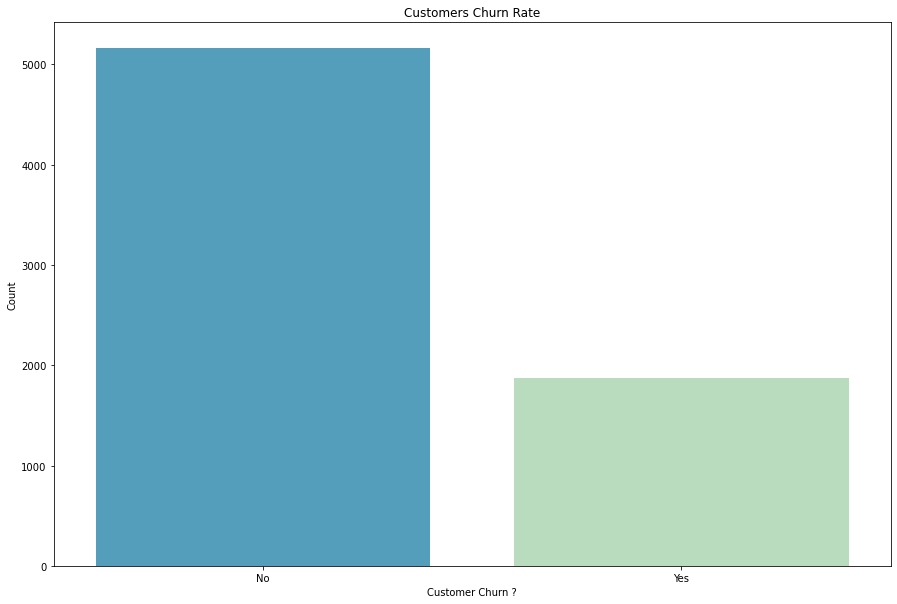

In [20]:
plt.figure(figsize=(15, 10))
#housing_sort=customer.sort_values('SalePrice',ascending=True)
sns.barplot(data=customer,
            y=customer['Churn'].value_counts().values,
            x=customer['Churn'].value_counts().index,
            palette='GnBu_r'
            #,hue='RoofMatl'
           ).set(title='Customers Churn Rate'
                 ,xlabel='Customer Churn ?'
                 ,ylabel='Count')

plt.savefig('CustomersChurnRate.png',dpi=300)

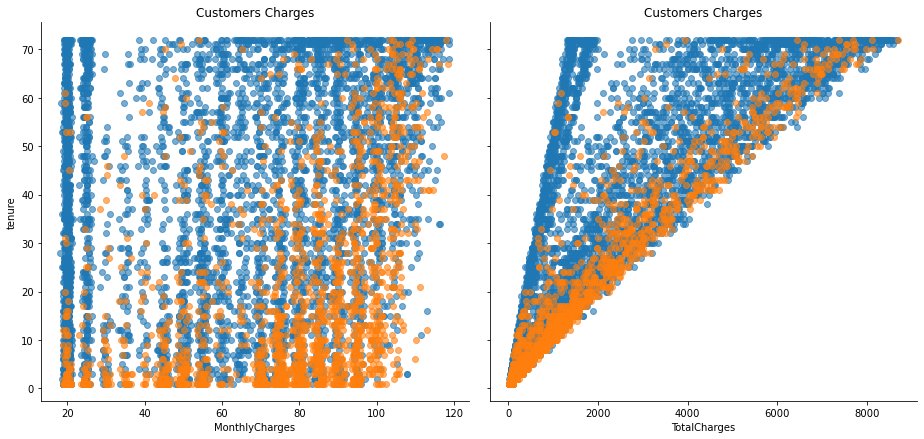

In [21]:



s = sns.PairGrid(customer, y_vars=["tenure"], x_vars=["MonthlyCharges", "TotalCharges"], height=6, hue="Churn", aspect=1.1)
s.set(title='Customers Charges')
ax = s.map(plt.scatter, alpha=0.6)


plt.savefig('CustomersChargesRate.png',dpi=300)

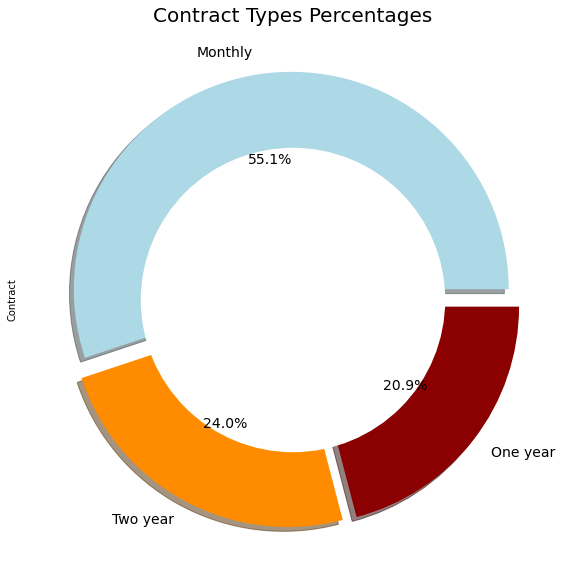

In [22]:
# contract in the dataset
ax = (customer['Contract'].value_counts()*100.0 /len(customer))\
.plot.pie(autopct='%.1f%%',explode=(0.05,0.05,0.05),shadow=True,colors=['lightblue','darkorange','darkred'],figsize =(15,10), fontsize = 14 ) 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
    
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


ax.set_title('Contract Types Percentages', fontsize = 20)


fig = px.histogram(customer, x="Churn", color="Contract", barmode="group"
                   , title="<b>Customer Contracts Distribution<b>",
                   color_discrete_map={"Monthly": "#1C8356", "One year": "#00CC96" ,"Two year": "#B6E880"})
fig.update_layout(width=800, height=600, bargap=0.1,
                 xaxis_title="Churn",yaxis_title="Count",legend_title="Contract Type")

plt.savefig('CustomerTypePercentage.png',dpi=300)

fig.show()

### <span style='color:navy'> Most of Cutomers that leaves are with Monthly contracts ( 75% ).
### <span style='color:navy'> Customers with Longer period contracts are less likely to leave.
### <span style='color:navy'> Over all More than half cutomers have Monthly charged contracts.
    
   

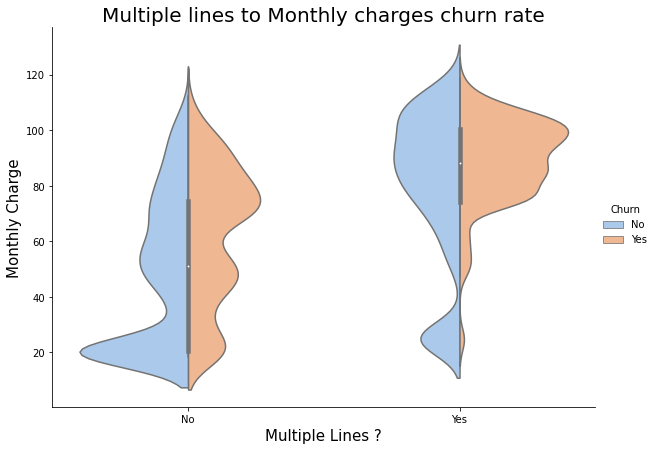

In [23]:
ax = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=customer, height=6, aspect=1.4)
plt.title("Multiple lines to Monthly charges churn rate" , fontsize=20)
plt.xlabel("Multiple Lines ?", fontsize=15)
plt.ylabel("Monthly Charge", fontsize=15)

plt.savefig('MultiplelinesMonthlychurnrate.png',dpi=300)

### <span style='color:navy'> Customers with multiple lines and higher monthly cost are more likely to churn.

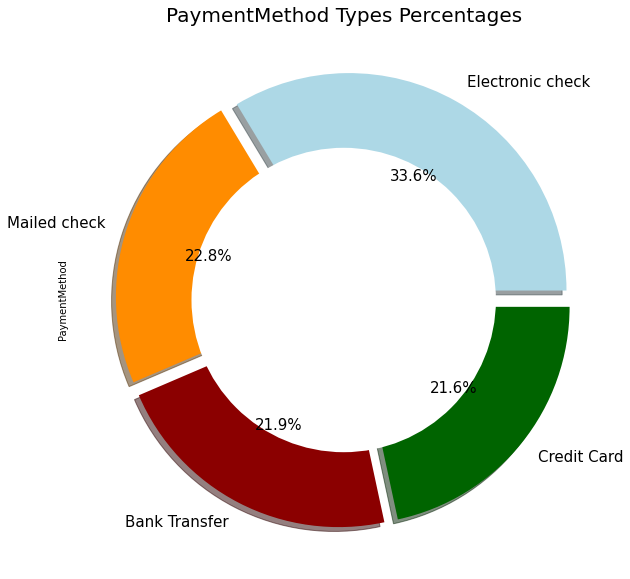

In [24]:
# PaymentMethod in the dataset
ax = (customer['PaymentMethod'].value_counts()*100.0 /len(customer))\
.plot.pie(autopct='%.1f%%',explode=(0.05,0.05,0.05,0.05),shadow=True,colors=['lightblue','darkorange','darkred','darkgreen'],figsize =(15,10), fontsize = 15 ) 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)


ax.set_title('PaymentMethod Types Percentages', fontsize = 20)



fig = px.histogram(customer, x="Churn", color="PaymentMethod", title="<b>Customer Payment Methods")
fig.update_layout(width=800, height=600, bargap=0.1,
                 xaxis_title="Churn",yaxis_title="Count",legend_title="Payment Method")


plt.savefig('PaymentMethodTypesPercentages.png',dpi=300)
fig.show()

### <span style='color:navy'> 33.7% Customers who left were having Electronic Check as Payment Method.
### <span style='color:navy'> Customers with Credit-Cards or Bank Transfer or Mailed Check as Payment Method were less likely to leave. <span>
          

In [25]:
fig = px.histogram(customer, x="Churn", color="Dependents", barmode="group",
                   title="Dependents Distribution" , color_discrete_map={"Yes": "#E15F99", "No": "#620042"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Dependants?")
fig.show()




### <span style='color:navy'> Customers **without** Dependants are more likely to churn. <span>


In [26]:
fig = px.histogram(customer, x="Churn", color="Partner", barmode="group",
                   title="Partners Distribution" , color_discrete_map={"Yes": "#DC3912", "No": "#FF9900"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="With Partner?")
fig.show()

### <span style='color:navy'> Customers without Partners are more likely to churn <span>

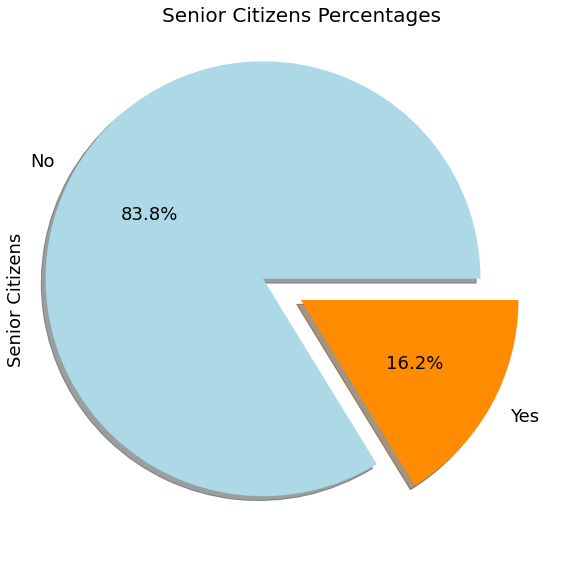

In [27]:

# SeniorCitizen in the dataset
ax = (customer['SeniorCitizen'].value_counts()*100.0 /len(customer))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],explode=(0.2,0),shadow=True,colors=['lightblue','darkorange'],figsize =(15,10), fontsize = 18 )                                                                           
ax.set_ylabel('Senior Citizens',fontsize = 18)
ax.set_title('Senior Citizens Percentages', fontsize = 20)



fig = px.histogram(customer, x="Churn", color="SeniorCitizen",
                   title="<b>Senior Citizens Distribution" , color_discrete_map={"Yes": "#1BECF", "No": "#FF99"}
                  , labels={0: "No", 1: "Yes"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Is Senior?")

labels = {'0': "No", '1': "Yes"}
fig.for_each_trace(lambda t: t.update(name = labels[t.name],
                                      legendgroup = labels[t.name],
                                      hovertemplate = t.hovertemplate.replace(t.name, labels[t.name])
                                     )
                  )

plt.savefig('SeniorCitizensPercentages.png',dpi=300)

fig.show()

### <span style='color:navy'> Most Customers are young , with only %16.3 of them as seniors .
### <span style='color:navy'> Senior Customers are more likely to stay , Majority of customers who churn are young <span>


In [28]:
fig = px.histogram(customer, x="Churn", color="OnlineSecurity",
                   title="<b>Churn relation with Online Security" , color_discrete_map={"Yes": "#FECB52", "No": "#C4451C"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Security?")


fig.show()

### <span style='color:navy'> Most Cutomers leaving does not have online security.

In [29]:
fig = px.histogram(customer, x="Churn", color="PaperlessBilling",
                   title="<b>Churn relation with Paper / Paperless billing" ,
                   color_discrete_map={"Yes": "#222A2A", "No": "#BAB0AC"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Is Papaerless?")


fig.show()

### <span style='color:navy'> Customers with Paperless Billing are most likely to churn.

In [30]:
fig = px.histogram(customer, x="Churn", color="TechSupport",
                   title="<b>Churn relation to Tech Support" ,
                   color_discrete_map={"Yes": "#E15F99", "No": "#FF9DA6"})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have Tech Support?")


fig.show()

### <span style='color:navy'> Most Leaving Cutomers have to Tech Support.

In [31]:
fig = px.histogram(customer, x="Churn", color="PhoneService",
                   title="<b>Churn relation to PhoneService" ,
                   color_discrete_map={"Yes": '#00CC96', "No": '#B6E880'})
fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Count",legend_title="Have PhoneService?")


fig.show()

### <span style='color:navy'> Most Leaving Cutomers have Phone Service .

In [32]:

ax.set_title('Internet Services', fontsize = 20)


fig = px.histogram(customer, x="Churn", color="InternetService", barmode="group"
                   , title="<b>Customer Internet Service Distribution<b>"
                   #,color_discrete_map={"Monthly": "#1C8356", "One year": "#00CC96" ,"Two year": "#B6E880"}
                  )
fig.update_layout(width=800, height=600, bargap=0.1,
                 xaxis_title="Churn",yaxis_title="Count",legend_title="Service Type")
fig.show()

### <span style='color:navy'> Most Leaving Cutomers have Fiber optic internet service .

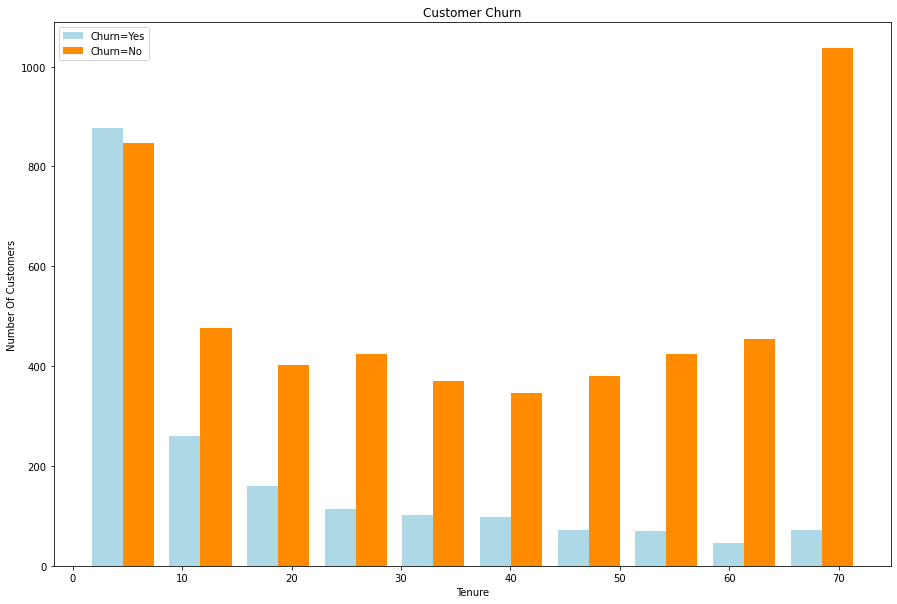

<Figure size 432x288 with 0 Axes>

In [33]:
#Number of churn customers based on tenure
tenure_churn_no=customer[customer.Churn=='No'].tenure
tenure_churn_yes=customer[customer.Churn=='Yes'].tenure
plt.figure(figsize=(15,10))
plt.xlabel("Tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn")
plt.hist([tenure_churn_yes,tenure_churn_no],color=['lightblue','darkorange'],label=['Churn=Yes','Churn=No'])
plt.legend()
plt.show()

plt.savefig('CustomerChurnTenure.png',dpi=300)




### ### <span style='color:navy'> The customers who do not churn tend to stay for a longer tenure with the telecom company.

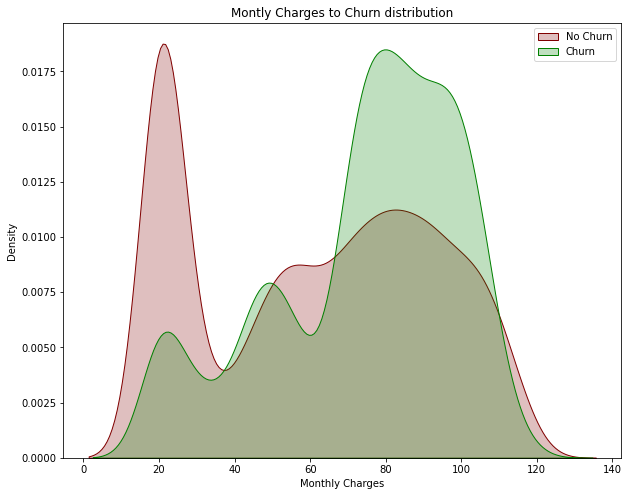

In [34]:


plt.figure(figsize=(10, 8))
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'No') ],
                color="maroon", shade = True);
ax = sns.kdeplot(customer.MonthlyCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="green", shade= True);
ax.legend(["No Churn","Churn"]);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Montly Charges to Churn distribution');

plt.savefig('MontlyChargestoChurndistribution.png',dpi=300)


### <span style='color:navy'> Customers with higher Monthly Charges are also more likely to churn

In [35]:
fig = px.box(customer, x='Churn', y = 'tenure',title="<b>Churn vs Tenure" ,)

fig.update_layout(width=800, height=600, bargap=0.1,
                  xaxis_title="Churn",yaxis_title="Months",legend_title="Churn Vvs Tenure")

fig.show()

### <span style='color:navy'> New Customers are more likely to churn.


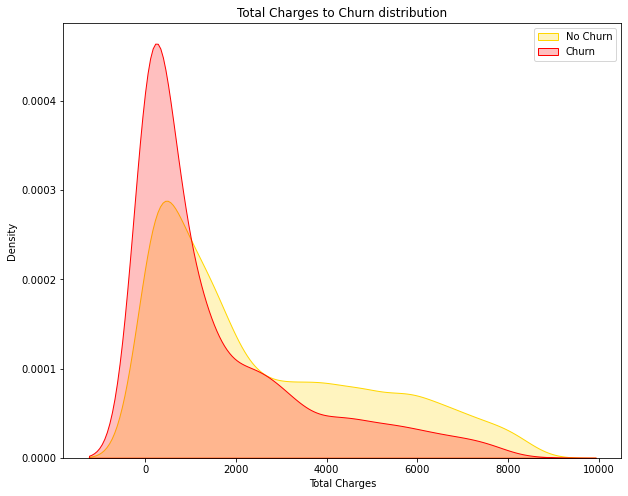

In [36]:

plt.figure(figsize=(10, 8))
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(customer.TotalCharges[(customer["Churn"] == 'Yes') ],
                ax =ax, color="red", shade= True);
ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Total Charges to Churn distribution');

plt.savefig('TotalChargestoChurndistribution.png',dpi=300)

### <span style='color:navy'> Cutomers that leaves does not have high Total charges in geneal .

## Modeling

In [37]:
Output_customer = customer.copy()

In [38]:
# convert All Categorical Values to numerical


# customer['Partner'] = customer['Partner'].apply(lambda x: 0 if x=='No' else 1)
# customer['Dependents'] = customer['Dependents'].apply(lambda x: 0 if x=='No' else 1)
# customer['PhoneService'] = customer['PhoneService'].apply(lambda x: 0 if x=='No' else 1)
# customer['OnlineSecurity'] = customer['OnlineSecurity'].apply(lambda x: 0 if x=='No' else 1)
# customer['OnlineBackup'] = customer['OnlineBackup'].apply(lambda x: 0 if x=='No' else 1)
# customer['DeviceProtection'] = customer['DeviceProtection'].apply(lambda x: 0 if x=='No' else 1)
# customer['StreamingTV'] = customer['StreamingTV'].apply(lambda x: 0 if x=='No' else 1)
# customer['StreamingMovies'] = customer['StreamingMovies'].apply(lambda x: 0 if x=='No' else 1)
# customer['PaperlessBilling'] = customer['PaperlessBilling'].apply(lambda x: 0 if x=='No' else 1)
# customer['Churn'] = customer['Churn'].apply(lambda x: 0 if x=='No' else 1)


binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

LE = LabelEncoder()
for column in binary_columns:
    customer[column] = LE.fit_transform(customer[column])




customer

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7038  6840-RESVB       1              0        1           1      24   
7039  2234-XADUH       0              0        1           1      72   
7040  4801-JZAZL       0              0        1           1      11   
7041  8361-LTMKD       1              1        1           0       4   
7042  3186-AJIEK       1              0        0           0      66   

      PhoneService  MultipleLines InternetService  OnlineSecurity  ...  \
0                0              0             DSL               0  ...   
1                1              0             DSL               1  ...   
2                1              0             DSL               1  ...   
3                0              0             DSL               1  ...   
4                1              0     Fiber optic               0  ...   
...            ...            ...             ...             ...  ...   
7038             1              1             DSL               1  ...   
7039             1              1     Fiber optic               0  ...   
7040             0              0             DSL               1  ...   
7041             1              1     Fiber optic               0  ...   
7042             1              0     Fiber optic               1  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0   Monthly   
1                    1            0            0                0  One year   
2                    0            0            0                0   Monthly   
3                    1            1            0                0  One year   
4                    0            0            0                0   Monthly   
...                ...          ...          ...              ...       ...   
7038                 1            1            1                1  One year   
7039                 1            0            1                1  One year   
7040                 0            0            0                0   Monthly   
7041                 0            0            0                0   Monthly   
7042                 1            1            1                1  Two year   

     PaperlessBilling     PaymentMethod MonthlyCharges  TotalCharges  Churn  
0                   1  Electronic check          29.85         29.85      0  
1                   0      Mailed check          56.95       1889.50      0  
2                   1      Mailed check          53.85        108.15      1  
3                   0     Bank Transfer          42.30       1840.75      0  
4                   1  Electronic check          70.70        151.65      1  
...               ...               ...            ...           ...    ...  
7038                1      Mailed check          84.80       1990.50      0  
7039                1       Credit Card         103.20       7362.90      0  
7040                1  Electronic check          29.60        346.45      0  
7041                1      Mailed check          74.40        306.60      1  
7042                1     Bank Transfer         105.65       6844.50      0  

[7032 rows x 21 columns]

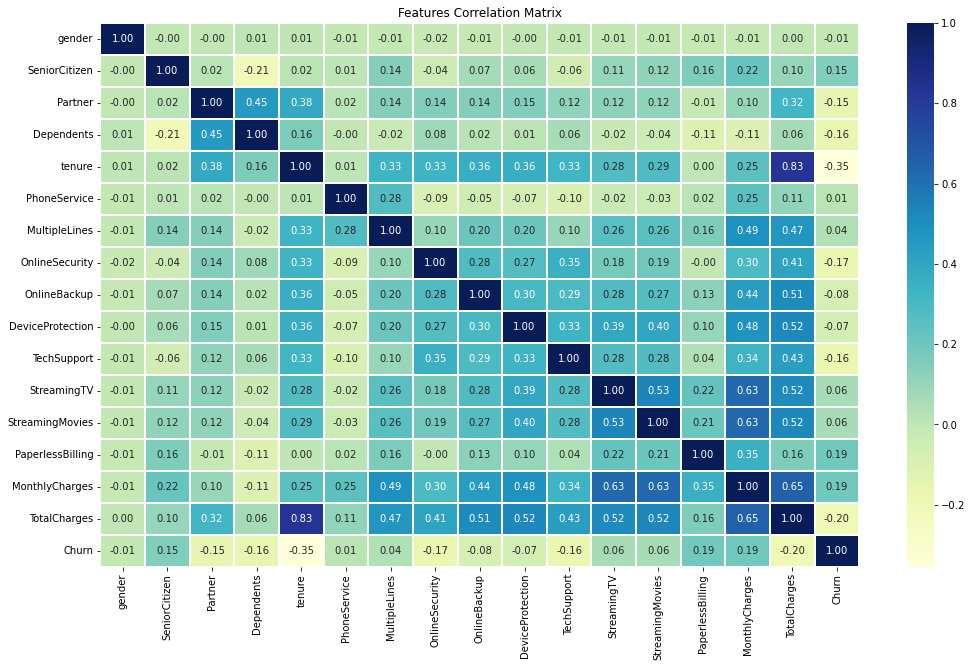

In [39]:
plt.figure(figsize=(17, 10))

corr = customer.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(customer.corr(), 
                 linewidths=.2, cmap="YlGnBu",annot = True, fmt = '.2f')

ax.set(title='Features Correlation Matrix')

plt.savefig('FeaturesCorrelationMatrix.png',dpi=300)

In [40]:
# skew_df = pd.DataFrame(customer.select_dtypes(np.number).columns, columns=['Feature'])
# skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(customer[feature]))
# skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
# skew_df



# data['TotalCharges'] = np.log(data['TotalCharges'])

In [41]:
# Dropping ID column after assiging values to output df



customer.drop('customerID',axis =1 , inplace= True)



In [42]:
# Create Dummies Values for payment column


dummies_payment = pd.get_dummies(customer['PaymentMethod'], drop_first= True)
customer = pd.concat([customer, dummies_payment], axis=1)
customer.drop('PaymentMethod',axis =1 , inplace= True)

In [43]:
# Change the features of Internet and Contracts to numerical based on indexes

Internet = ['No', 'DSL', 'Fiber optic']
Contract = ['Monthly', 'One year', 'Two year']

customer['InternetService'] = customer['InternetService'].apply(lambda x: Internet.index(x))
customer['Contract'] = customer['Contract'].apply(lambda x: Contract.index(x))

In [44]:
X = customer.drop('Churn', axis= 1)
y = customer['Churn']



In [45]:
# X = pd.get_dummies(customer, drop_first= True)
X

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0                 0                1               0             1  ...   
1                 0                1               1             0  ...   
2                 0                1               1             1  ...   
3                 0                1               1             0  ...   
4                 0                2               0             0  ...   
...             ...              ...             ...           ...  ...   
7038              1                1               1             0  ...   
7039              1                2               0             1  ...   
7040              0                1               1             0  ...   
7041              1                2               0             0  ...   
7042              0                2               1             0  ...   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               1            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            1            1                1         1                 1   
7039            0            1                1         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            1            1                1         2                 1   

      MonthlyCharges  TotalCharges  Credit Card  Electronic check  \
0              29.85         29.85            0                 1   
1              56.95       1889.50            0                 0   
2              53.85        108.15            0                 0   
3              42.30       1840.75            0                 0   
4              70.70        151.65            0                 1   
...              ...           ...          ...               ...   
7038           84.80       1990.50            0                 0   
7039          103.20       7362.90            1                 0   
7040           29.60        346.45            0                 1   
7041           74.40        306.60            0                 0   
7042          105.65       6844.50            0                 0   

      Mailed check  
0                0  
1                1  
2                1  
3                0  
4                0  
...            ...  
7038             1  
7039             0  
7040             0  
7041             1  
7042             0  

[7032 rows x 21 columns]

In [46]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, stratify= y, random_state= 42)

In [48]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3459
1    1252
Name: Churn, dtype: int64
0    1704
1     617
Name: Churn, dtype: int64


In [49]:
models = {
    'Logistic Regression' : LogisticRegression(),
    'XGBoost' : XGBClassifier(),
    'Naive Bayes' : GaussianNB(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'CatBoost' : CatBoostClassifier(verbose=0)
}

In [50]:
# getting each model score using Cross Val Score

results = {}

kf = KFold(n_splits= 5)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

In [51]:
for name, result in results.items():
    printmd("----------------")
    printmd(f'{name} : {np.mean(result)}')

----------------

Logistic Regression : 0.8468922807088484

----------------

XGBoost : 0.8245913251017436

----------------

Naive Bayes : 0.8293518679010342

----------------

Gradient Boosting : 0.8454651123333596

----------------

Random Forest : 0.8315019754614141

----------------

CatBoost : 0.8422839721523123

### <span style='color:navy'> Logistic Regression seems to be the best .

In [52]:
LR =  LogisticRegression()

LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_pred_prob = LR.predict_proba(X_test)[:, 1]

In [53]:
predictions = pd.DataFrame({'Probability of Customer Churning': y_pred_prob, 'Probability of customer not churning' : 1 - y_pred_prob})
predictions


Probability of Customer Churning  Probability of customer not churning
0                             0.419360                              0.580640
1                             0.749242                              0.250758
2                             0.100074                              0.899926
3                             0.091490                              0.908510
4                             0.174606                              0.825394
...                                ...                                   ...
2316                          0.621062                              0.378938
2317                          0.426367                              0.573633
2318                          0.104716                              0.895284
2319                          0.743363                              0.256637
2320                          0.132733                              0.867267

[2321 rows x 2 columns]

In [54]:

print('ROC accuracy Score:', round(roc_auc_score(y_test, y_pred_prob), 3))

ROC accuracy Score: 0.841


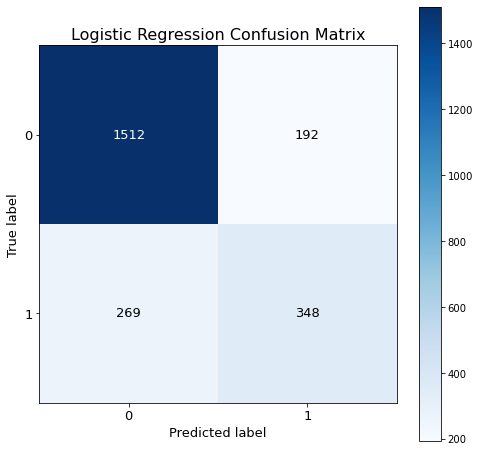

In [55]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,8),hide_zeros=True ,text_fontsize= 13
                                   ,title="Logistic Regression Confusion Matrix" ,title_fontsize= 16
                                   )


plt.savefig('LogisticRegressionConfusionMatrix.png',dpi=300)

### <span style='color:navy'> From the confusion matrix we can see that: 
- ### <span style='color:navy'> There are total 1543+158 =1701 actual non-churn values and the algorithm predicts 1543 of them as non churn and 158 of them as churn. 
- ### <span style='color:navy'>There are 276+337= 613 actual churn values and the algorithm predicts 276 of them as non churn values and 337 of them as churn values.

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1704
           1       0.64      0.56      0.60       617

    accuracy                           0.80      2321
   macro avg       0.75      0.73      0.73      2321
weighted avg       0.79      0.80      0.80      2321



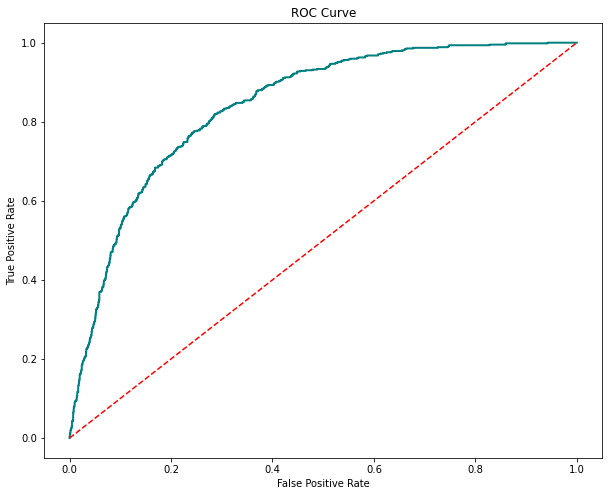

In [57]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


plt.savefig('ROCCurve.png',dpi=300)
plt.show()

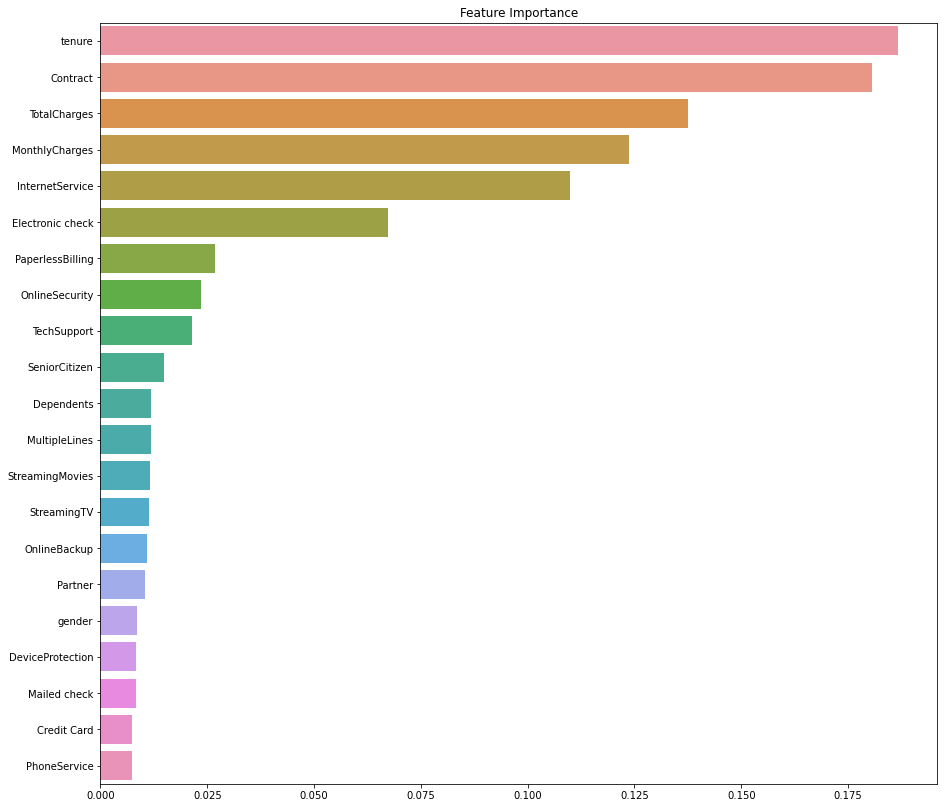

In [58]:
# Features Importance

x, y = customer.drop('Churn', axis= 1), customer['Churn']


# Fit RandomForest Classifier

RF = RandomForestClassifier(random_state = 0, n_jobs= 4, n_estimators= 5000, max_depth= 8)
RF = RF.fit(x, y)

# Plot features importances

Features = pd.Series(data=RF.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(15,14))
plt.title("Feature Importance")
ax = sns.barplot(y=Features.index, x=Features.values, orient='h')

plt.savefig('FeatureImportance.png',dpi=300)



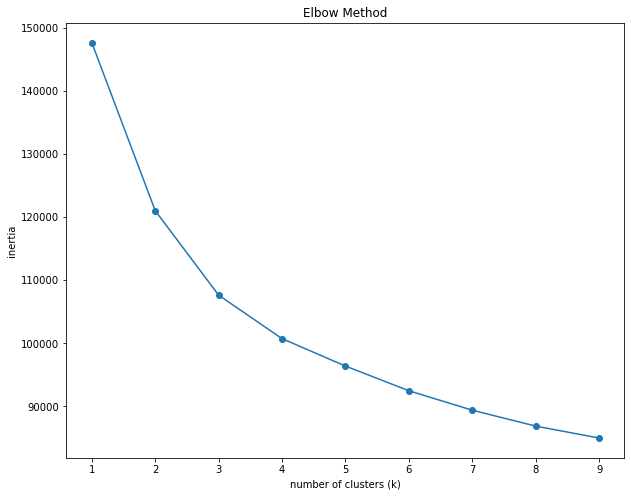

In [59]:
# Clustering


from sklearn.cluster import KMeans


num_clusters = list(range(1,10))
inertias = []

for k in num_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertias.append(model.inertia_)

    
plt.figure(figsize=(10,8))    
plt.plot(num_clusters, inertias, '-o')
plt.title("Elbow Method")
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.savefig('ElbowMethod.png',dpi=300)
plt.show()



In [60]:
score_list=[]
for n_clusters in range(2,15):
        clusterer = KMeans (n_clusters=n_clusters).fit(X)
        preds = clusterer.predict(X)
        centers = clusterer.cluster_centers_

        score = silhouette_score (X, preds, metric='euclidean')
        score_list.append(score)
        print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.1738115970516544)
For n_clusters = 3, silhouette score is 0.1512946591689183)
For n_clusters = 4, silhouette score is 0.16286081935782298)
For n_clusters = 5, silhouette score is 0.12660232981736894)
For n_clusters = 6, silhouette score is 0.12446651558875475)
For n_clusters = 7, silhouette score is 0.11257209906978075)
For n_clusters = 8, silhouette score is 0.10904532431459188)
For n_clusters = 9, silhouette score is 0.11161024618321719)
For n_clusters = 10, silhouette score is 0.1082099543267478)
For n_clusters = 11, silhouette score is 0.10015744259473339)
For n_clusters = 12, silhouette score is 0.10055944560745808)
For n_clusters = 13, silhouette score is 0.10493811762155583)
For n_clusters = 14, silhouette score is 0.1034177081558166)


#### This indicates 4 to be the best way to cluster. Since at k=4 it shows the maximum silhouette score.

In [61]:
model=KMeans(n_clusters=4)
model.fit(X)


KMeans(n_clusters=4)

In [62]:
# Predicting The Churn possiblity for current customers .
Output_customer['Prediction'] = LR.predict_proba(X)[:,1]

Output_customer['Cluster'] = model.labels_

Output_customer


customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
0              No            No             DSL             No  ...   
1             Yes            No             DSL            Yes  ...   
2             Yes            No             DSL            Yes  ...   
3              No            No             DSL            Yes  ...   
4             Yes            No     Fiber optic             No  ...   
...           ...           ...             ...            ...  ...   
7038          Yes           Yes             DSL            Yes  ...   
7039          Yes           Yes     Fiber optic             No  ...   
7040           No            No             DSL            Yes  ...   
7041          Yes           Yes     Fiber optic             No  ...   
7042          Yes            No     Fiber optic            Yes  ...   

     StreamingTV StreamingMovies  Contract PaperlessBilling     PaymentMethod  \
0             No              No   Monthly              Yes  Electronic check   
1             No              No  One year               No      Mailed check   
2             No              No   Monthly              Yes      Mailed check   
3             No              No  One year               No     Bank Transfer   
4             No              No   Monthly              Yes  Electronic check   
...          ...             ...       ...              ...               ...   
7038         Yes             Yes  One year              Yes      Mailed check   
7039         Yes             Yes  One year              Yes       Credit Card   
7040          No              No   Monthly              Yes  Electronic check   
7041          No              No   Monthly              Yes      Mailed check   
7042         Yes             Yes  Two year              Yes     Bank Transfer   

     MonthlyCharges TotalCharges Churn  Prediction  Cluster  
0             29.85        29.85    No    0.621395        0  
1             56.95      1889.50    No    0.045690        2  
2             53.85       108.15   Yes    0.288137        2  
3             42.30      1840.75    No    0.027764        0  
4             70.70       151.65   Yes    0.686075        1  
...             ...          ...   ...         ...      ...  
7038          84.80      1990.50    No    0.118794        3  
7039         103.20      7362.90    No    0.149362        3  
7040          29.60       346.45    No    0.389963        0  
7041          74.40       306.60   Yes    0.725579        1  
7042         105.65      6844.50    No    0.046455        3  

[7032 rows x 23 columns]

In [63]:
print('Mean predict proba of churn:',round(Output_customer[Output_customer['Churn'] == 1]['Prediction'].mean(),2))
print('Mean predict proba of NON-churn:',round(Output_customer[Output_customer['Churn'] == 0]['Prediction'].mean(),2))

Mean predict proba of churn: nan
Mean predict proba of NON-churn: nan


In [64]:
PotentialChurn = Output_customer[Output_customer['Churn'] == 'No'].sort_values('Prediction',ascending=False)
PotentialChurn = PotentialChurn[['customerID','Churn','Prediction','Cluster']]

PotentialChurn

customerID Churn  Prediction  Cluster
3159  5150-ITWWB    No    0.850225        1
3346  2545-EBUPK    No    0.826376        1
935   6630-UJZMY    No    0.817376        1
4039  8161-QYMTT    No    0.810169        1
5213  7668-XCFYV    No    0.804027        1
...          ...   ...         ...      ...
2524  0784-ZQJZX    No    0.001332        2
109   2848-YXSMW    No    0.001332        2
1527  0640-YJTPY    No    0.001326        2
1824  0794-YVSGE    No    0.001309        2
2338  4277-BWBML    No    0.001288        2

[5163 rows x 4 columns]

In [65]:

# PotentialChurn['Churn'] = PotentialChurn['Churn'].apply(lambda x: 0 if x=='No' else 1)

# s = sns.lmplot(x='Churn', y='Prediction', hue='Cluster',
#            data=PotentialChurn, fit_reg=True,height=6, aspect=2 , legend = False).set(title='Cluster',
#                                                               xlabel='Total Area (sqft)',
#                                                               ylabel='Price ($)')
# s.add_legend(title="Sales Price Vs Basements Size and Type")

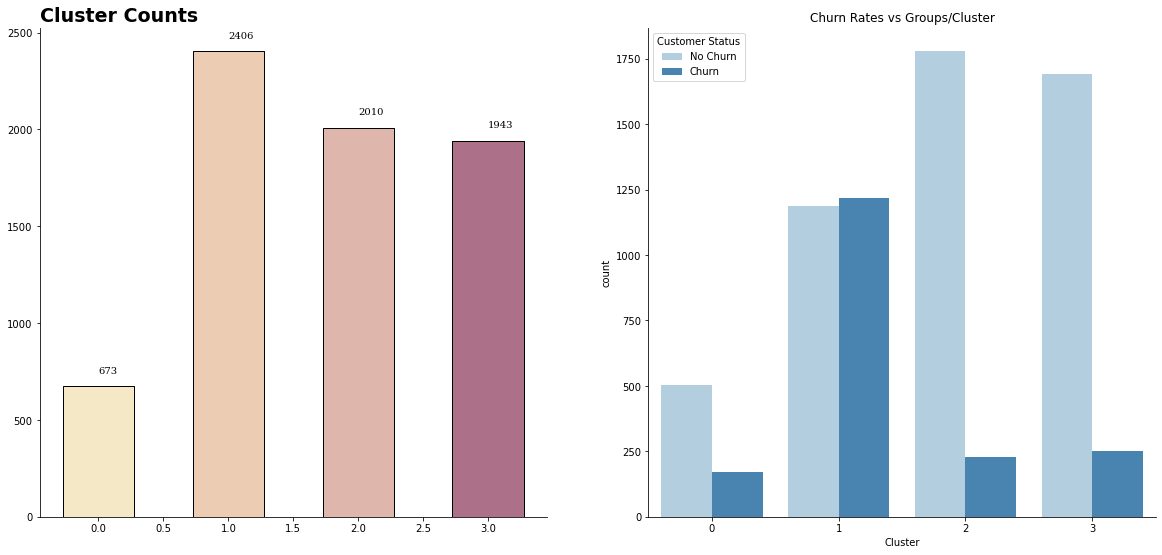

In [66]:
Clusters = Output_customer['Cluster'].value_counts().sort_index()



fig, ax = plt.subplots(1,2, figsize=(20, 9))

ax[0].bar(Clusters.index, Clusters,
          edgecolor='black', color=['#F5E8C7', '#ECCCB2', '#DEB6AB', '#AC7088']
       ,width=0.55 )
ax[0].set_title('Cluster Counts', loc='left', fontsize=19, fontweight='bold')
for i in Clusters.index:
    ax[0].annotate(f"{Clusters[i]}", 
                   xy=(i, Clusters[i] + 80),
                   va = 'center', fontfamily='serif',
                   color='black')
for s in ['top', 'right']:
    ax[0].spines[s].set_visible(False)
    
    
sns.countplot(x='Cluster', hue="Churn", palette="Blues", data=Output_customer)
sns.despine()
plt.legend(title='Customer Status', labels=['No Churn', 'Churn'])
plt.title("Churn Rates vs Groups/Cluster")

plt.savefig('ChrunCountsCluster.png',dpi=300)
plt.show()

### <span style='color:navy'> Most Customers who churn are from Cluster 2 . 

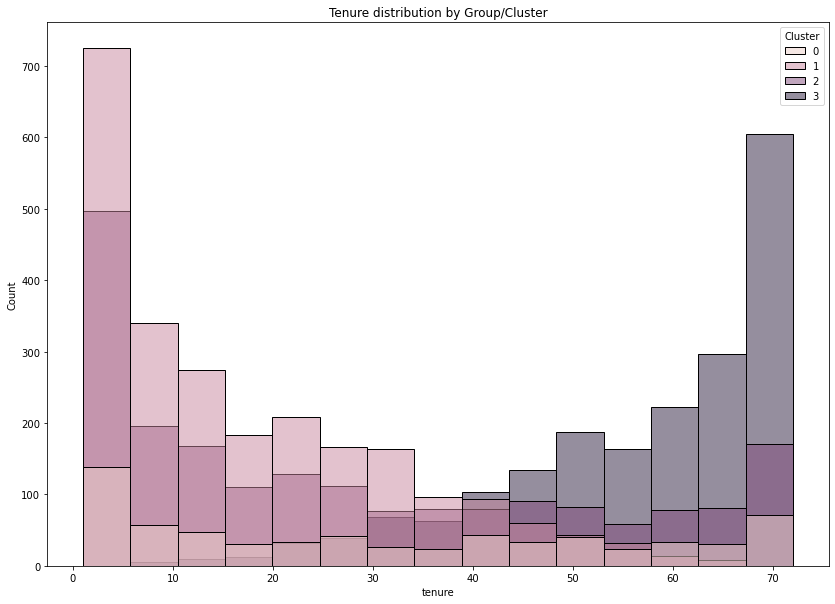

In [67]:
plt.figure(figsize=(14, 10))
sns.histplot(data=Output_customer, x="tenure", hue="Cluster")
plt.title('Tenure distribution by Group/Cluster')
plt.savefig('TenuredistributionbyCluster.png',dpi=300)
plt.show()

### <span style='color:navy'> Cluster 2 and 3 have shorter tenure compared to 0 and 1 . 

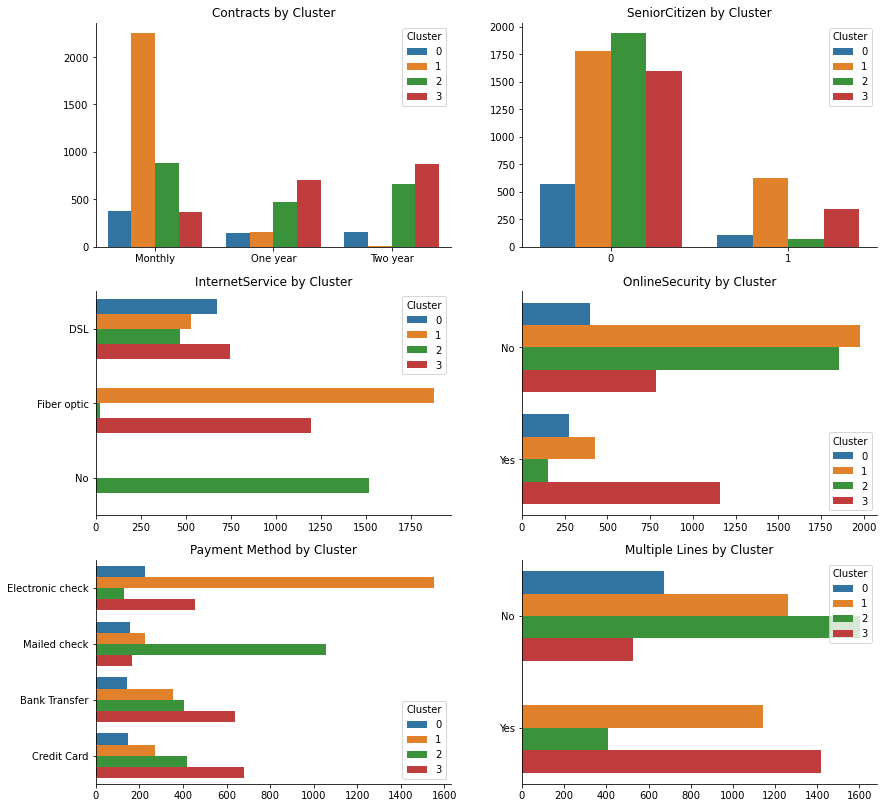

In [68]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,14))
sns.despine()




ax = sns.countplot(x="Contract", hue="Cluster", data=Output_customer, ax = axes[0,0]).set(title='Contracts by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(x="SeniorCitizen", hue="Cluster", data=Output_customer, ax = axes[0,1]).set(title='SeniorCitizen by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='InternetService', hue="Cluster", data=Output_customer,ax = axes[1,0]).set(title='InternetService by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='OnlineSecurity', hue="Cluster", data=Output_customer, ax = axes[1,1]).set(title='OnlineSecurity by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='PaymentMethod', hue="Cluster", data=Output_customer, ax = axes[2,0]).set(title='Payment Method by Cluster', xlabel=None, ylabel = None)
ax = sns.countplot(y='MultipleLines', hue="Cluster", data=Output_customer, ax = axes[2,1]).set(title='Multiple Lines by Cluster', xlabel=None, ylabel = None)





sns.despine()

plt.savefig('FeaturesnbyCluster.png',dpi=300)

### <span style='color:navy'> Cluster 2 have the following attributes :

- ### In Monthly Contracts
- ### Not Senior
- ### Does not have Online Security
- ### Uses Fiber optic
- ### Pay wit Electronic Checks

# <span style='color:red'> Recommendation and Future Work

## <span style='color:blue'> We should pay more attention to customers who meet the criterias below (CLuster 2)

- ### Contract: Monthly
- ### Tenure: Short tenure
- ### Payment method: Electronic check
- ### Internet Service: Fiber Optic
- ### New and Young in age



## <span style='color:blue'> Cutomers Churn is bad to any company ,there are different strategies that can be implemented to prevent that such as :
- ### identifying the risk of a cutomer going away.
- ### work toward improving cutomer satisfaction.
- ### improving cutomer service.
- ### creating customer loyality programs with benefits that fits the customer needs and age group.
- ### try to understand the resons of customers leaving by survays or any other feedback method.



## <span style='color:blue'> Future Work :
- ### Try to improve the accuracy of the model used by doing more feature enginnering enhancments and hyper parameter tuning .
- ### try to implement more features into the model whether custom created or negotiate with the telco company to provide more features to analyze . 